In [2]:
import numpy as np
# Define measurements
measurements = [(1.2, 3.4), (2.5, 4.6), (3.8, 5.2)]

# State transition function
def f(state, dt):
    x, y, orientation = state
    x_dot = 0.5 * np.cos(orientation)
    y_dot = 0.5 * np.sin(orientation)
    orientation_dot = 0.1
    state_dot = np.array([x_dot, y_dot, orientation_dot])
    return state + state_dot * dt

# Jacobian of the state transition function
def F(state, dt):
    x, y, orientation = state
    F_mat = np.array([[1, 0, -0.5*np.sin(orientation)*dt],
                      [0, 1, 0.5*np.cos(orientation)*dt],
                      [0, 0, 1]])
    return F_mat

# Observation function
def h(state):
    x, y, orientation = state
    z = np.array([x, y])
    return z

# Jacobian of the observation function
def H(state):
    x, y, orientation = state
    H_mat = np.array([[1, 0, 0],
                      [0, 1, 0]])
    return H_mat

# Measurement noise covariance matrix
R = np.diag([0.1, 0.1])

# Process noise covariance matrix
Q = np.diag([0.01, 0.01, 0.01])

# Initial state estimate
state_estimate = np.array([0, 0, 0])

# Initial error covariance matrix
P = np.eye(3)

est= np.zeros([len(measurements),2])



# Loop through measurements
for i in range(len(measurements)):
    # Prediction step
    dt = 1 # time step
    state_estimate = f(state_estimate, dt)
    F_mat = F(state_estimate, dt)
    P = F_mat @ P @ F_mat.T + Q
    
    # Update step
    z = np.array([measurements[i][0], measurements[i][1]])
    H_mat = H(state_estimate)
    y = z - h(state_estimate)
    S = H_mat @ P @ H_mat.T + R
    K = P @ H_mat.T @ np.linalg.inv(S)
    state_estimate = state_estimate + K @ y
    P = (np.eye(3) - K @ H_mat) @ P
    
    est[i] = state_estimate[1:2]
    # Print current state estimate
    print("State estimate:", state_estimate)


State estimate: [1.13145931 3.14828728 1.31806278]
State estimate: [2.12802636 4.0590876  0.42353905]
State estimate: [3.09095099 4.56803476 0.36785735]


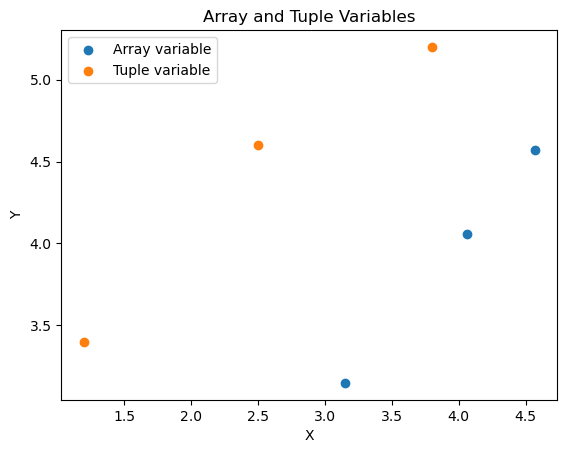

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Extract x and y values from the variables
array_x = est[:,0]
array_y = est[:,1]

tuple_x = [t[0] for t in measurements]
tuple_y = [t[1] for t in measurements]

# Plot the variables
fig, ax = plt.subplots()

ax.scatter(array_x, array_y, label="Array variable")
ax.scatter(tuple_x, tuple_y, label="Tuple variable")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Array and Tuple Variables")
ax.legend()

plt.show()

In [16]:
est

array([[1.13145931, 3.14828728, 1.31806278],
       [2.12802636, 4.0590876 , 0.42353905],
       [3.09095099, 4.56803476, 0.36785735]])

In [20]:
est

array([[3.14828728, 3.14828728],
       [4.0590876 , 4.0590876 ],
       [4.56803476, 4.56803476]])

In [ ]:
# Create a figure with two subplots
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10, 5))

#plt.subplot(2, 2, 1)
ax1.set_title('PositionXGPS')
ax1.plot([ms[0] for ms in mean_state_estimate_1], 'r', label = 'Dx Estimate')
ax1.plot(df_piksi_smartphone.loc[:,'lat_piksi_utm_easting'], 'm', label = 'true_mean_state')
ax1.plot(df_piksi_smartphone.loc[:,'lat_smartphone_utm_easting'], 'g', label = 'sensor reading')
ax1.legend(loc = 'upper right')


#plt.subplot(2, 2, 1)
ax2.set_title('PositionXGPS')
ax2.plot([ms[0] for ms in mean_state_estimate_1], 'r', label = 'Dx Estimate')
ax2.plot(df_piksi_smartphone.loc[:,'lat_piksi_utm_easting'], 'm', label = 'true_mean_state')
ax2.plot(df_piksi_smartphone.loc[:,'lat_smartphone_utm_easting'], 'g', label = 'sensor reading')
ax2.legend(loc = 'upper right')

In [23]:
import numpy as np
 
# Author: Addison Sears-Collins
# https://automaticaddison.com
# Description: Extended Kalman Filter example (two-wheeled mobile robot)
 
# Supress scientific notation when printing NumPy arrays
np.set_printoptions(precision=3,suppress=True)
 
# A matrix
# 3x3 matrix -> number of states x number of states matrix
# Expresses how the state of the system [x,y,yaw] changes 
# from k-1 to k when no control command is executed.
# Typically a robot on wheels only drives when the wheels are told to turn.
# For this case, A is the identity matrix.
# A is sometimes F in the literature.
A_k_minus_1 = np.array([[1.0,  0,   0],
                                                [  0,1.0,   0],
                                                [  0,  0, 1.0]])
 
# Noise applied to the forward kinematics (calculation
# of the estimated state at time k from the state
# transition model of the mobile robot). This is a vector
# with the number of elements equal to the number of states
process_noise_v_k_minus_1 = np.array([0.01,0.01,0.003])
     
# State model noise covariance matrix Q_k
# When Q is large, the Kalman Filter tracks large changes in 
# the sensor measurements more closely than for smaller Q.
# Q is a square matrix that has the same number of rows as states.
Q_k = np.array([[1.0,   0,   0],
                                [  0, 1.0,   0],
                                [  0,   0, 1.0]])
                 
# Measurement matrix H_k
# Used to convert the predicted state estimate at time k
# into predicted sensor measurements at time k.
# In this case, H will be the identity matrix since the 
# estimated state maps directly to state measurements from the 
# odometry data [x, y, yaw]
# H has the same number of rows as sensor measurements
# and same number of columns as states.
H_k = np.array([[1.0,  0,   0],
                                [  0,1.0,   0],
                                [  0,  0, 1.0]])
                         
# Sensor measurement noise covariance matrix R_k
# Has the same number of rows and columns as sensor measurements.
# If we are sure about the measurements, R will be near zero.
R_k = np.array([[1.0,   0,    0],
                                [  0, 1.0,    0],
                                [  0,    0, 1.0]])  
                 
# Sensor noise. This is a vector with the
# number of elements equal to the number of sensor measurements.
sensor_noise_w_k = np.array([0.07,0.07,0.04])
 
def getB(yaw, deltak):
    """
    Calculates and returns the B matrix
    3x2 matix -> number of states x number of control inputs
    The control inputs are the forward speed and the
    rotation rate around the z axis from the x-axis in the 
    counterclockwise direction.
    [v,yaw_rate]
    Expresses how the state of the system [x,y,yaw] changes
    from k-1 to k due to the control commands (i.e. control input).
    :param yaw: The yaw angle (rotation angle around the z axis) in rad 
    :param deltak: The change in time from time step k-1 to k in sec
    """
    B = np.array([  [np.cos(yaw)*deltak, 0],
                                    [np.sin(yaw)*deltak, 0],
                                    [0, deltak]])
    return B
 
def ekf(z_k_observation_vector, state_estimate_k_minus_1, 
        control_vector_k_minus_1, P_k_minus_1, dk):
    """
    Extended Kalman Filter. Fuses noisy sensor measurement to 
    create an optimal estimate of the state of the robotic system.
         
    INPUT
        :param z_k_observation_vector The observation from the Odometry
            3x1 NumPy Array [x,y,yaw] in the global reference frame
            in [meters,meters,radians].
        :param state_estimate_k_minus_1 The state estimate at time k-1
            3x1 NumPy Array [x,y,yaw] in the global reference frame
            in [meters,meters,radians].
        :param control_vector_k_minus_1 The control vector applied at time k-1
            3x1 NumPy Array [v,v,yaw rate] in the global reference frame
            in [meters per second,meters per second,radians per second].
        :param P_k_minus_1 The state covariance matrix estimate at time k-1
            3x3 NumPy Array
        :param dk Time interval in seconds
             
    OUTPUT
        :return state_estimate_k near-optimal state estimate at time k  
            3x1 NumPy Array ---> [meters,meters,radians]
        :return P_k state covariance_estimate for time k
            3x3 NumPy Array                 
    """
    ######################### Predict #############################
    # Predict the state estimate at time k based on the state 
    # estimate at time k-1 and the control input applied at time k-1.
    state_estimate_k = A_k_minus_1 @ (
            state_estimate_k_minus_1) + (
            getB(state_estimate_k_minus_1[2],dk)) @ (
            control_vector_k_minus_1) + (
            process_noise_v_k_minus_1)
             
    print(f'State Estimate Before EKF={state_estimate_k}')
             
    # Predict the state covariance estimate based on the previous
    # covariance and some noise
    P_k = A_k_minus_1 @ P_k_minus_1 @ A_k_minus_1.T + (
            Q_k)
         
    ################### Update (Correct) ##########################
    # Calculate the difference between the actual sensor measurements
    # at time k minus what the measurement model predicted 
    # the sensor measurements would be for the current timestep k.
    measurement_residual_y_k = z_k_observation_vector - (
            (H_k @ state_estimate_k) + (
            sensor_noise_w_k))
 
    print(f'Observation={z_k_observation_vector}')
             
    # Calculate the measurement residual covariance
    S_k = H_k @ P_k @ H_k.T + R_k
         
    # Calculate the near-optimal Kalman gain
    # We use pseudoinverse since some of the matrices might be
    # non-square or singular.
    K_k = P_k @ H_k.T @ np.linalg.pinv(S_k)
         
    # Calculate an updated state estimate for time k
    state_estimate_k = state_estimate_k + (K_k @ measurement_residual_y_k)
     
    # Update the state covariance estimate for time k
    P_k = P_k - (K_k @ H_k @ P_k)
     
    # Print the best (near-optimal) estimate of the current state of the robot
    print(f'State Estimate After EKF={state_estimate_k}')
 
    # Return the updated state and covariance estimates
    return state_estimate_k, P_k
     
def main():
 
    # We start at time k=1
    k = 1
     
    # Time interval in seconds
    dk = 1
 
    # Create a list of sensor observations at successive timesteps
    # Each list within z_k is an observation vector.
    z_k = np.array([[4.721,0.143,0.006], # k=1
                    [9.353,0.284,0.007], # k=2
                    [14.773,0.422,0.009],# k=3
                    [18.246,0.555,0.011], # k=4
                    [22.609,0.715,0.012]])# k=5
                     
    # The estimated state vector at time k-1 in the global reference frame.
    # [x_k_minus_1, y_k_minus_1, yaw_k_minus_1]
    # [meters, meters, radians]
    state_estimate_k_minus_1 = np.array([0.0,0.0,0.0])
     
    # The control input vector at time k-1 in the global reference frame.
    # [v, yaw_rate]
    # [meters/second, radians/second]
    # In the literature, this is commonly u.
    # Because there is no angular velocity and the robot begins at the 
    # origin with a 0 radians yaw angle, this robot is traveling along 
    # the positive x-axis in the global reference frame.
    control_vector_k_minus_1 = np.array([4.5,0.0])
     
    # State covariance matrix P_k_minus_1
    # This matrix has the same number of rows (and columns) as the 
    # number of states (i.e. 3x3 matrix). P is sometimes referred
    # to as Sigma in the literature. It represents an estimate of 
    # the accuracy of the state estimate at time k made using the
    # state transition matrix. We start off with guessed values.
    P_k_minus_1 = np.array([[0.1,  0,   0],
                                                    [  0,0.1,   0],
                                                    [  0,  0, 0.1]])
                             
    # Start at k=1 and go through each of the 5 sensor observations, 
    # one at a time. 
    # We stop right after timestep k=5 (i.e. the last sensor observation)
    for k, obs_vector_z_k in enumerate(z_k,start=1):
     
        # Print the current timestep
        print(f'Timestep k={k}')  
         
        # Run the Extended Kalman Filter and store the 
        # near-optimal state and covariance estimates
        optimal_state_estimate_k, covariance_estimate_k = ekf(
            obs_vector_z_k, # Most recent sensor measurement
            state_estimate_k_minus_1, # Our most recent estimate of the state
            control_vector_k_minus_1, # Our most recent control input
            P_k_minus_1, # Our most recent state covariance matrix
            dk) # Time interval
         
        # Get ready for the next timestep by updating the variable values
        state_estimate_k_minus_1 = optimal_state_estimate_k
        P_k_minus_1 = covariance_estimate_k
         
        # Print a blank line
        print()
 
# Program starts running here with the main method  
main()

Timestep k=1
State Estimate Before EKF=[4.51  0.01  0.003]
Observation=[4.721 0.143 0.006]
State Estimate After EKF=[ 4.584  0.043 -0.016]

Timestep k=2
State Estimate Before EKF=[ 9.093 -0.021 -0.013]
Observation=[9.353 0.284 0.007]
State Estimate After EKF=[ 9.208  0.121 -0.025]

Timestep k=3
State Estimate Before EKF=[13.716  0.017 -0.022]
Observation=[14.773  0.422  0.009]
State Estimate After EKF=[14.324  0.224 -0.028]

Timestep k=4
State Estimate Before EKF=[18.832  0.109 -0.025]
Observation=[18.246  0.555  0.011]
State Estimate After EKF=[18.427  0.341 -0.027]

Timestep k=5
State Estimate Before EKF=[22.935  0.228 -0.024]
Observation=[22.609  0.715  0.012]
State Estimate After EKF=[22.69   0.486 -0.027]



In [26]:
import numpy as np

# State vector
x = np.zeros((3,1))

# Covariance matrix
P = np.eye(3)

# Measurement noise
R = np.eye(6) * 0.01

# Process noise
Q = np.eye(3) * 0.001

# Motion model
def motion_model(x, v, w, dt):
    x[0] += dt * v * np.cos(x[2])
    x[1] += dt * v * np.sin(x[2])
    x[2] += dt * w
    return x

# Measurement model
def measurement_model(x):
    lat1, lon1 = x[0,0], x[1,0]
    lat2, lon2 = x[0,0], x[1,0] + 0.01
    lat3, lon3 = x[0,0] + 0.01, x[1,0]
    z = np.array([lat1, lon1, lat2, lon2, lat3, lon3]) + np.random.randn(6,1) * np.sqrt(R)
    return z

# Kalman filter algorithm
def EKF(x, P, z, v, w, dt):
    # Prediction
    x_pred = motion_model(x, v, w, dt)
    F = np.array([[1, 0, -dt*v*np.sin(x[2])],
                  [0, 1, dt*v*np.cos(x[2])],
                  [0, 0, 1]])
    P_pred = F @ P @ F.T + Q
    
    # Measurement update
    H = np.array([[1, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0]])
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
    x = x_pred + K @ (z - measurement_model(x_pred))
    P = (np.eye(3) - K @ H) @ P_pred
    
    return x, P

# Example usage
dt = 0.1
v = 1.0
w = 0.1

for i in range(100):
    # Simulate a measurement
    z = measurement_model(x)
    
    # Run EKF
    x, P = EKF(x, P, z, v, w, dt)
    
    # Print results
    print(f"Step {i}: x = {x.T}, P = \n{P}")



C:\Users\Z0168020\AppData\Local\Temp\ipykernel_20512\3287930536.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  F = np.array([[1, 0, -dt*v*np.sin(x[2])],


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6 is different from 3)

In [31]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math


# offsets of each variable in the mean state matrix
state_Dx, state_Dy, state_theta = 0,1,2
num_states = max(state_Dx, state_Dy, state_theta) + 1

class EKF:
    def __init__(self, initial_x, 
                       initial_v,
                       initial_theta,
                       accel_variance) -> None:
        
        self._x = np.zeros(num_states).reshape(num_states,1) 
        self._x[state_Dx] = initial_x[0] + initial_v*math.cos(initial_theta)
        self._x[state_Dy] = initial_x[1] + initial_v*math.sin(initial_theta)
        self._x[state_theta] = initial_theta
        
        self._accel_variance = np.eye(3) * accel_variance

        self._P = np.eye(num_states) 
    
    def predict(self, dt: float) -> None:
        F = np.array([[1, 0, *math.sin(self._x[2])*dt],
                  [0, 1, math.cos(self._x[2])*dt],
                  [0, 0, 1]])
        predicted_x = self._x + F.dot(self._x)
        G = np.eye(3) 
        predicted_P = F.dot(self._P).dot(F.T) + G.dot(self._accel_variance).dot(G.T)

        self._P = predicted_P
        self._x = predicted_x
        
    def update(self, meas_value, meas_variance):
         H = np.array([[1, 0, 0*math.sin(self._x[2])],
                  [0, 1, -1*math.cos(self._x[2])],
                  [1, 0, -0.8*math.sin(self._x[2])],
                  [0, 1, 0.8*math.cos(self._x[2])],
                  [1, 0, 0.8*math.sin(self._x[2])],
                  [0, 1, 0.8*math.cos(self._x[2])]])
            
        z = meas_value 
        R = meas_variance
        y = z - H.dot(self._x)
        S = H.dot(self._P).dot(H.T) + R
        K = self._P.dot(H.T).dot(np.linalg.inv(S))
        updated_x = self._x + K.dot(y)
        updated_P = (np.eye(4) - K.dot(H)).dot(self._P)
        
        self._x = updated_x
        self._P = updated_P        

    @property
    def cov(self) -> np.array:
        return self._P

    @property
    def mean(self) -> np.array:
        return self._x

    @property
    def pos(self) -> float:
        return self._x[iX]

    @property
    def vel(self) -> float:
        return self._x[iV]
    

        

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 37)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

state_Dx, state_Dy, state_theta = 0, 1, 2
num_states = max(state_Dx, state_Dy, state_theta) + 1

class EKF:
    def __init__(self, initial_x, initial_v, initial_theta, accel_variance) -> None:
        self._x = np.zeros(num_states).reshape(num_states,1) 
        self._x[state_Dx] = initial_x[0] + initial_v*math.cos(initial_theta)
        self._x[state_Dy] = initial_x[1] + initial_v*math.sin(initial_theta)
        self._x[state_theta] = initial_theta
        
        self._accel_variance = np.eye(3) * accel_variance
        self._P = np.eye(num_states) 
    
    def predict(self, dt: float) -> None:
        F = np.array([[1, 0, *math.sin(self._x[2])*dt*math.pi/180],
                      [0, 1, math.cos(self._x[2])*dt*math.pi/180],
                      [0, 0, 1]])
        predicted_x = self._x + F.dot(self._x)
        G = np.eye(3) 
        predicted_P = F.dot(self._P).dot(F.T) + G.dot(self._accel_variance).dot(G.T)

        self._P = predicted_P
        self._x = predicted_x
        
    def update(self, meas_value, meas_variance):
        H = np.array([[1, 0, 0*math.sin(self._x[2])],
                      [0, 1, -1*math.cos(self._x[2])],
                      [1, 0, -0.8*math.sin(self._x[2])],
                      [0, 1, 0.8*math.cos(self._x[2])],
                      [1, 0, 0.8*math.sin(self._x[2])],
                      [0, 1, 0.8*math.cos(self._x[2])]])
            
        z = meas_value 
        R = meas_variance
        y = z - H.dot(self._x)
        S = H.dot(self._P).dot(H.T) + R
        K = self._P.dot(H.T).dot(np.linalg.inv(S))
        updated_x = self._x + K.dot(y)
        updated_P = (np.eye(num_states) - K.dot(H)).dot(self._P)
        
        self._x = updated_x
        self._P = updated_P        

    @property
    def cov(self) -> np.array:
        return self._P

   
